<a href="https://colab.research.google.com/github/Mickael03/SplineCubica/blob/main/Spline_C%C3%BAbica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import matplotlib
print(f'Versão do Matplotlib: {matplotlib.__version__}')
print(f'Versão do numpy: {np.__version__}')

Versão do Matplotlib: 3.2.2
Versão do numpy: 1.21.5


# Funções

## Coeficientes da Matriz de solução

* Condição - 1
> $S_{0}(x_{0}) = y_{0}$  
$S_{i}(x_{i}) = y_{i}$

* Condição - 2
> $S_{0}(x_{i}) = y_{i}$  
$S_{i}(x_{i+1}) = y_{i+1}$

* Condição - 3
> $S_{0}^{'}(x_{i}) = S_{i}^{'}(x_{i})$

* Condição - 4
> $S_{0}^{''}(x_{i}) = S_{i}^{''}(x_{i})$

* Condição - 5
> $S_{0}^{''}(x_{0}) = 0$  
$S_{i}^{''}(x_{i}) = 0$


In [ ]:
#Coeficientes da matriz
def coeficientes(x = [1,2,3]):
  #Número de equações
  n_equacao = len(x) - 1

  #Matriz dos coeficientes
  coeficientes = []
  
  #Condição I
  i = 1
  j = 0
  while i <= n_equacao:
    k = [0 for i in range(4*n_equacao)]
    k[j] = 1
    coeficientes.append(k)
    j += 4
    i += 1
  
  #Condição II
  i = 0
  j = 0
  while i < n_equacao:
    k = [0 for i in range(4*n_equacao)]
    k[j]  = 1
    k[j+1] = x[i+1] - x[i]
    k[j+2] = (x[i+1] - x[i])**2
    k[j+3] = (x[i+1] - x[i])**3
    coeficientes.append(k)
    j += 4
    i += 1
  
  #Condição III
  i = 0
  j = 0
  while i < n_equacao - 1:
    k = [0 for i in range(4*n_equacao)]
    k[j+1] = 1
    k[j+2] = 2*(x[i+1] - x[i])
    k[j+3] = 3*(x[i+1] - x[i])**2
    k[j+5] = -1
    coeficientes.append(k)
    j += 4
    i += 1
  
  #Condição IV
  i = 0
  j = 0
  while i < n_equacao-1:
    k = [0 for i in range(4*n_equacao)]
    k[j+2] = 2
    k[j+3] = 6*(x[i+1] - x[i])
    k[j+6] = -2
    if i < n_equacao -1:
      coeficientes.append(k)
    j += 4
    i += 1

  #Condição V
  i = 0
  j = 0
  while i < n_equacao:
    k = [0 for i in range(4*n_equacao)]
    if i == 0:
      k[j+2] = 2
      k[j+3] = 0
      coeficientes.append(k)
    if i == n_equacao - 1:
      k[j+2] = 2
      k[j+3] = 6*(x[i+1] - x[i])
      coeficientes.append(k)
    j += 4
    i += 1
  
  
  return coeficientes

In [ ]:
coeficientes(x=[1,2,3])

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 2, 3, 0, -1, 0, 0],
 [0, 0, 2, 6, 0, 0, -2, 0],
 [0, 0, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 6]]

## Matriz com resultados dos coeficientes

In [ ]:
'''
#Matriz dos resultados
def resultados(y = [1,2,3]):
  #Número de equações
  n_equacao = len(y) - 1

  #Lista sem resultados
  k = []

  #Adicão a lista com os valores de y_i
  k.append(y[0])
  for i in range(1,len(y)-1):
    k.append(y[i])
    k.append(y[i])
  k.append(y[len(y)-1])

  #Complementação de k para criar matriz de solução 
  for i in range(4*n_equacao - len(k)):
    k.append(0)

  return k
  '''

'\n#Matriz dos resultados\ndef resultados(y = [1,2,3]):\n  #Número de equações\n  n_equacao = len(y) - 1\n\n  #Lista sem resultados\n  k = []\n\n  #Adicão a lista com os valores de y_i\n  k.append(y[0])\n  for i in range(1,len(y)-1):\n    k.append(y[i])\n    k.append(y[i])\n  k.append(y[len(y)-1])\n\n  #Complementação de k para criar matriz de solução \n  for i in range(4*n_equacao - len(k)):\n    k.append(0)\n\n  return k\n  '

In [ ]:
resultados()

[1, 2, 2, 3, 0, 0, 0, 0]

In [ ]:
def r(y = [1, 2, 3]):
  #Número de equações
  n_equacoes = len(y) - 1

  #k = [y[i] for i in range(len(y)-1)]
  #j = [y[i] for i in range(len(y)) if i >= 1]

  #Lista com resultados não nulos
  z = [y[i] for i in range(len(y)-1)] + [y[i] for i in range(len(y)) if i >= 1]

  #complementado a lista para solução do sistema matricial
  for i in range(4*n_equacoes - len(z)):
    z.append(0)
    
  return z

In [ ]:
r()

[1, 2, 2, 3, 0, 0, 0, 0]

# Solução dos sistema

In [ ]:
#Matriz do sistema de Spline cúbico
A = coeficientes(x = [1, 2, 3])
b = r(y = [2, 3, 5])

In [ ]:
#Solução do sistema linear, função do numpy
solucao = np.linalg.solve(A,b)
solucao

array([ 2.  ,  0.75,  0.  ,  0.25,  3.  ,  1.5 ,  0.75, -0.25])

In [ ]:
#Unido tudo todas etapas anteriores em uma unica função
def solucao(x = [], y = []):
  A = coeficientes(x)
  b = r(y)

  solve = np.linalg.solve(A,b)
  l2 = [i for i in solve]
  
  return l2

In [ ]:
solucao(x = [1, 2, 3], y = [2, 3, 5])

[2.0, 0.75, 0.0, 0.25, 3.0, 1.5, 0.75, -0.25]

# Problema

Tabela com dados para construir a interpolação Spline Cúbica:

> 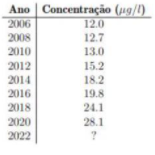

In [ ]:
#Dados fornecidos no problema
anos = [2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
concentracao = [12.0, 12.7, 13.0, 15.2, 18.2, 19.8, 24.1, 28.1]

In [ ]:
#Processandos os dados de entrada para obtenção dos coeficientes das curva de spline cúbica
solucao(anos,concentracao)

[12.0,
 0.458588114050154,
 0.0,
 -0.027147028512538585,
 12.7,
 0.13282377189969097,
 -0.16288217107523148,
 0.08573514256269309,
 13.0,
 0.5101167983510823,
 0.35152868430092704,
 -0.028293541738234167,
 15.199999999999996,
 1.5767090346959804,
 0.18176743387152208,
 -0.11006097560975611,
 18.2,
 0.9830470628649953,
 -0.47859841978701456,
 0.19353744417725863,
 19.8,
 1.3911027138440404,
 0.6826262452765373,
 -0.1515888010992786,
 24.1,
 2.302542081758846,
 -0.22690656131913453,
 0.03781776021985576]

# Solução

Subistituindo os coeficientes obtidos por meio da função `solucao(anos, concentracao)` construimos a seguinte função Spline para o problema:

$S(x)=\begin{cases}
12+0,45859(x-2006)-0,02716(x-2006)^{3}, &se\ 2006\leq x\leq 2008\\
12,7+0,13282(x-2008)-0,16288(x-2008)^{2}+0,08573(x-2008)^{3}, &se\  2008\leq x\leq 2010 \\
13+0,51012(x-2010)+0,35153(x-2010)^{2}-0,02829(x-2010)^{3}, &se\ 2010\leq x\leq 2012\\
15,2+1,57671(x-2012)+0,18177(x-2012)^{2}-0,11006(x-2012)^{3}, &se\ 2012\leq x\leq 2014\\
18,2+0,98305(x-2014)-0,4786(x-2014)^{2}+0,19354(x-2014)^{3}, &se\ 2014\leq x\leq 2016\\
19,8+1,3911(x-2016)+0,68263(x-2016)^{2}-0,15159(x-2016)^{3}, &se\ 2016\leq x\leq 2018\\
24,1+2,30254(x-2018)-0,22691(x-2018)^{2}+0,03782(x-2018)^{3}, &se\ x\geq 2018
\end{cases}$

Construindo um função computacional `Spline_Cubic(x)` para obtenção do valor da concentração de acordo com o ano, variavel **x** representa o ano, essa função criada e especificar para o sistema apresentado acima.

In [ ]:
#Função para cálculo do Spline Cubica desse problema específico
def Spline_Cubic(x):
  if x < 2006:
    return 12 + 0.45859*(x-2006)-0.02716*(x-2006)**3
  elif 2006 <= x < 2008:
    return 12 + 0.45859*(x-2006)-0.02716*(x-2006)**3
  elif 2008 <= x < 2010:
    return 12.7 + 0.13282*(x-2008)-0.16288*(x-2008)**2+0.08573*(x-2008)**3
  elif 2010 <= x < 2012:
    return 13+0.51012*(x-2010)+0.35153*(x-2010)**2-0.02829*(x-2010)**3
  elif 2012 <= x < 2014:
    return 15.2+1.57671*(x-2012)+0.18177*(x-2012)**2-0.11006*(x-2012)**3
  elif 2014 <= x < 2016:
    return 18.2+0.98305*(x-2014)-0.4786*(x-2014)**2+0.19354*(x-2014)**3
  elif 2016 <= x < 2018:
    return 19.8+1.3911*(x-2016)+0.68263*(x-2016)**2-0.15159*(x-2016)**3
  else:
    return 24.1+2.30254*(x-2018)-0.22691*(x-2018)**2+0.03782*(x-2018)**3

In [ ]:
#Cálculo para concentração em 2022
Spline_Cubic(2022)

32.100080000000005

Cálculado o valor da concentração para 2022 temos que $S(2022) = 24,1+2,30254(2022-2018)-0,22691(2022-2018)^{2}+0,03782(2022-2018)^{3} = 32,1\ \mu g/l$

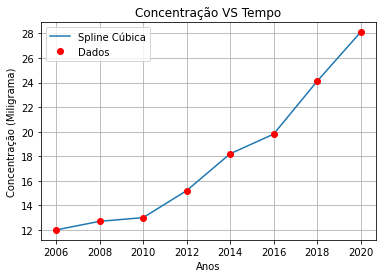

In [ ]:
#Inserção dos dados para cálculo do spline cubico
x = [i for i in range(2006, 2022, 2)]
s = [Spline_Cubic(i) for i in x]

#Curva para serem plotadas
plt.plot(x,s,label='Spline Cúbica')
plt.plot(anos,concentracao, 'ro', label='Dados')

#Caracteristicas
plt.grid(True)
plt.title('Concentração VS Tempo')
plt.xlabel('Anos')
plt.xticks([i for i in range(2006, 2022, 2)])
plt.ylabel('Concentração (Miligrama)')

#Funções
plt.legend()
plt.show()

Abaixo seguir o gráfico construido no [GeoGebra](https://www.geogebra.org/calculator) onde se apresenta os intervalos e pontos obtidos.
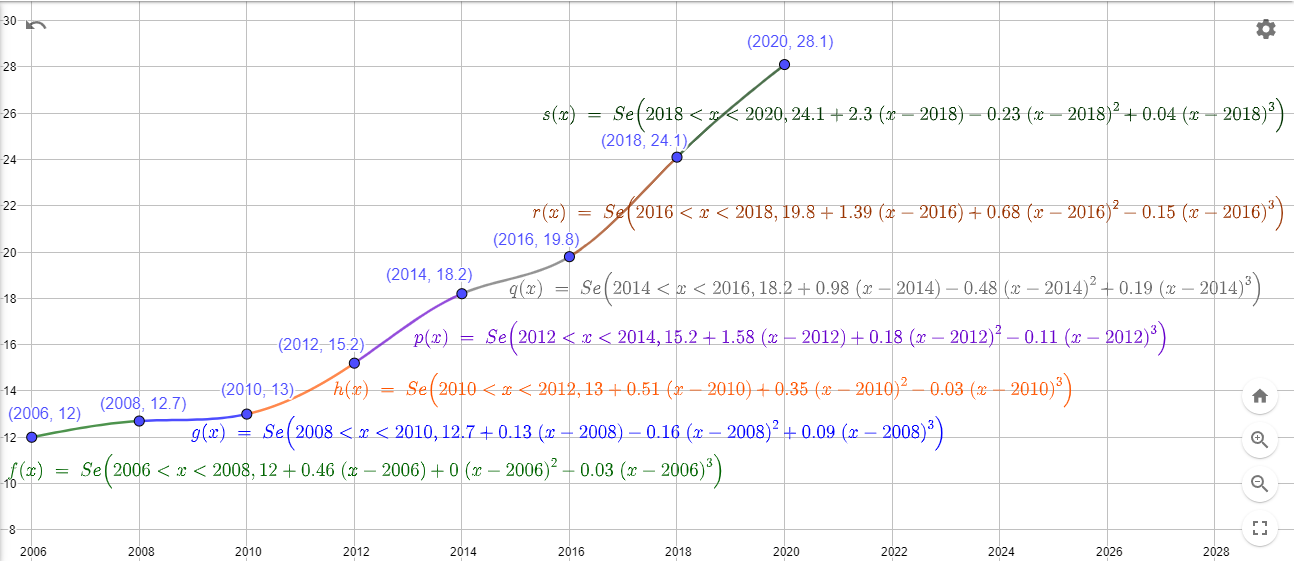

Retirando os dados sobre os anos 2010 e 2012 e construindo uma nova curva de Spline Cúbica

In [ ]:
#Dados com retirada dos anos de 2010 e 2012 fornecidos no problema
anos1 = [2006, 2008, 2014, 2016, 2018, 2020]
concentracao1 = [12.0, 12.7, 18.2, 19.8, 24.1, 28.1]

In [ ]:
#Coeficientes do Spline Cúbica
solucao(anos1,concentracao1)

[12.0,
 0.23949138293400551,
 0.0,
 0.027627154266498533,
 12.7,
 0.5710172341319879,
 0.1657629255989912,
 -0.018025781140535234,
 18.2,
 0.613387978142077,
 -0.15870113493064295,
 0.12600357292980238,
 19.800000000000004,
 1.4906263135771336,
 0.5973203026481714,
 -0.13381672971836905,
 24.1,
 2.274106767549391,
 -0.20558007566204298,
 0.03426334594367383]

Subistituindo os coeficientes obtidos por meio da função `solucao(anos, concentracao)` construimos a seguinte função Spline para o problema:

$S(x)=\begin{cases}
12+0,2395(x-2006)-0,0276(x-2006)^{3}, &se\ 2006\leq x\leq 2008\\
12,7+0,571(x-2008)+0,1658(x-2008)^{2}-0,018(x-2008)^{3}, &se\  2008\leq x\leq 2014 \\
18,2+0,6134(x-2014)-0,1587(x-2014)^{2}+0,126(x-2014)^{3}, &se\ 2014\leq x\leq 2016\\
19,8+1,4906(x-2016)+0,5973(x-2016)^{2}-0,1338(x-2016)^{3}, &se\ 2016\leq x\leq 2018\\
24,1+2,2741(x-2018)-0,20558(x-2018)^{2}+0,03426(x-2018)^{3}, &se\ x\geq 2018
\end{cases}$

Construindo um função computacional `Spline_Cubic_02(x)` para obtenção do valor da concentração de acordo com o ano, variavel **x** representa o ano, essa função criada e especificar para o sistema apresentado acima.

In [ ]:
#Função para cálculo do Spline Cubica com retirada dos dados 2010 e 2012
def Spline_Cubic_02(x):
  if x < 2008:
    return 12 + 0.2395*(x-2006)+0.02716*(x-2006)**3
  elif 2008 <= x < 2014:
    return 12.7 + 0.5710*(x-2008)+0.1658*(x-2008)**2-0.018*(x-2008)**3
  elif 2014 <= x < 2016:
    return 18.2 + 0.6134*(x-2014)-0.1587*(x-2014)**2+0.126*(x-2014)**3
  elif 2016 <= x < 2018:
    return 19.8+1.4906*(x-2016)+0.5973*(x-2016)**2-0.1338*(x-2016)**3
  else:
    return 24.1+2.2741*(x-2018)-0.20558*(x-2018)**2+0.03426*(x-2018)**3

In [ ]:
#Cálculando os valores de concentração para os anos de 2010 e 2012 pelo Spline considerando todos os dados 
print(f'Valor da concentração em 2010: {Spline_Cubic(2010)}')
print(f'Valor da concentração em 2012: {Spline_Cubic(2012)}')

Valor da concentração em 2010: 13.0
Valor da concentração em 2012: 15.2


In [ ]:
#Cálculando os valores de concentração para 2010 e 2012 sem os dados relativos a esse dois anos
print(f'Valor da concentração em 2010: {Spline_Cubic_02(2010)}')
print(f'Valor da concentração em 2012: {Spline_Cubic_02(2012)}')

Valor da concentração em 2010: 14.361199999999998
Valor da concentração em 2012: 16.484799999999996


Os valores da concentração estimados pelo Spline Cúbico para os anos de 2010 e 2012 são 14,3612 e 16,4848 quando desconsideramos os dados referêntes a esse dois anos. Os valores estimados corresponde a um erro relativo de 10,47% e 8,45% em relação ao dados apresentados. 

Já notamos que não existe diferença dos valores estimados pelo Spline Cúbica quando consideramos todos os valores apresentados

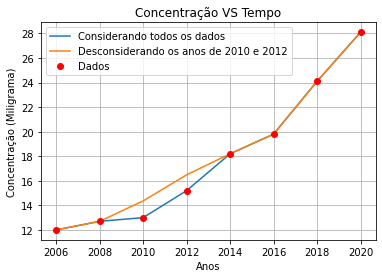

In [ ]:
#Inserção dos dados para cálculo do spline cubico
x = [i for i in range(2006, 2022, 2)]
s1 = [Spline_Cubic(i) for i in x]
s2 = [Spline_Cubic_02(i) for i in x]

#Curva para serem plotadas
plt.plot(x,s1,label='Considerando todos os dados')
plt.plot(x,s2,label='Desconsiderando os anos de 2010 e 2012')
plt.plot(anos,concentracao, 'ro', label='Dados')

#Caracteristicas
plt.grid(True)
plt.title('Concentração VS Tempo')
plt.xlabel('Anos')
plt.xticks([i for i in range(2006, 2022, 2)])
plt.ylabel('Concentração (Miligrama)')

#Funções
plt.legend()
plt.show()

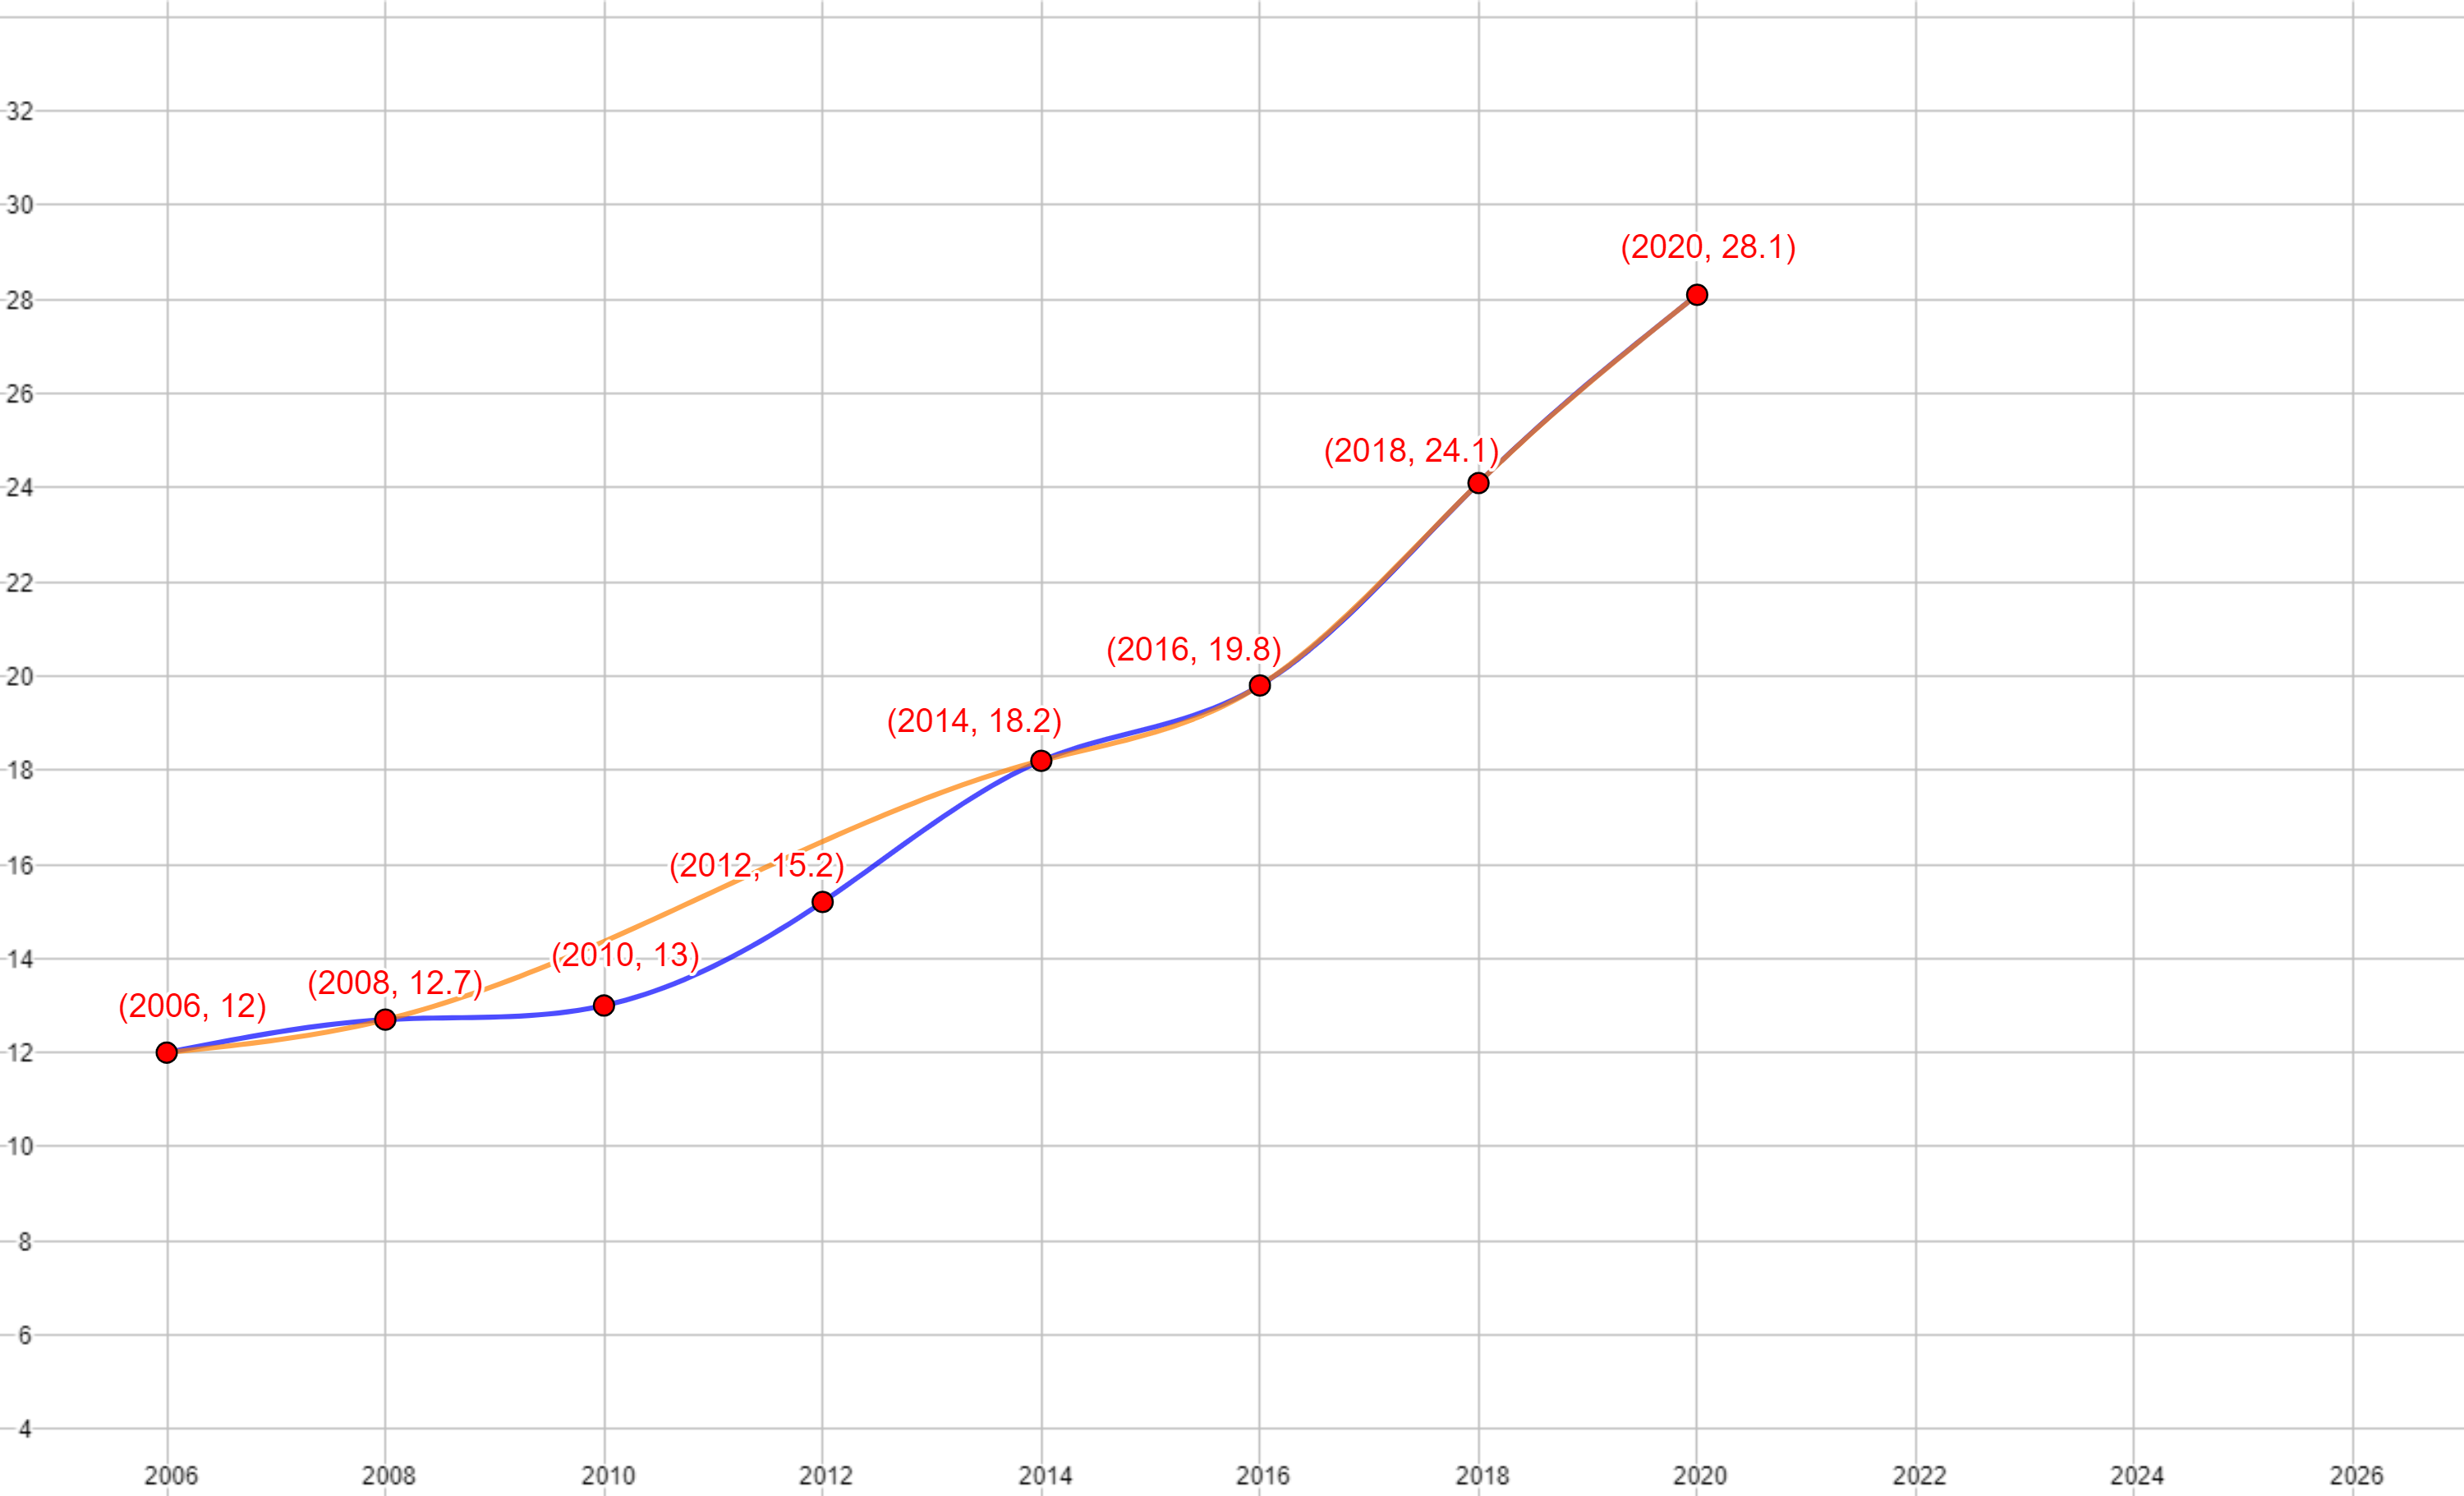

A melhor curva para estimaçaõ des resultados aquela obtida com a utilização de todos os dados apresentados, deste que as obtenções deles se mostrem corretas, sem qualquer procedimento que questione suas validações. Por desconhecemos os processo de obtenção desses dados não podemos questionar sua validade nos obrigando a aceita todos como validos. 

O gráfico gerado pela interpolação das duas curvas e os pontos utilizados mostram um diferença muito perceptível no intervalo entre os anos de 2008 e 2014. Isso se deve a não consideramos os anos de 2010 e 2012 já que na primeira curva gerada eles são extremamente importante como pontos de referência para tornamos a curva mais precisa. Quando mais pontos e intervalos menos entre eles mais precisa se torna a curva de interpolação

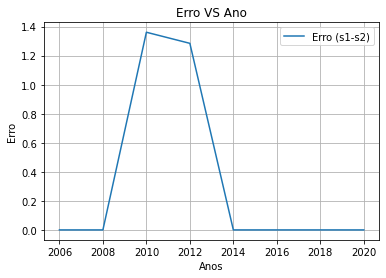

In [ ]:
#Inserção dos dados para cálculo do spline cubico
erro = [s2[i]-s1[i]for i in range(8)]

#Curva para serem plotadas
plt.plot(anos,erro,label='Erro (s1-s2)')

#Caracteristicas
plt.grid(True)
plt.title('Erro VS Ano')
plt.xlabel('Anos')
plt.xticks([i for i in range(2006, 2022, 2)])
plt.ylabel('Erro')

#Funções
plt.legend()
plt.show()

# Função Spline Cúbica Geral

In [ ]:
#Criando o implemento da função para calculo de uma valor
def Spline_Cubica(x = [], y = [], **kwargs):
  
  #Coeficientes do spline cubica
  coeficientes = solucao(x,y)
  
  #Mostra os coeficientes da função spline
  A = kwargs.get('coeficientes')

  if A == True:
    return coeficientes

  #Gráfido da função
  grafico = kwargs.get('grafico')

  #Codígo de construção de gráfico
  if grafico == True:

    plt.plot(x, y, 'ro', label='Dados')
    
    z = [i for i in np.arange(x[0]-0.5,x[len(x)-1] + 0.5,0.01)]
    k = [Spline_Cubica(x,y,valor = i) for i in z]
    plt.plot(z, k, label = 'Curva Spline Cubica')
    
    plt.xlabel('Eixo - x')
    plt.ylabel('Eixo - y')
    plt.title('Eixo : X - Eixo : Y')
    plt.grid(True)

    plt.legend()
    plt.show()

    return
  
  #Determinação do valor de um spline 
  valor = kwargs.get('valor')

  #Determinação dos coeficientes a serem utilizados
  count = 0
  while count < len(x):
   if count == len(x) - 2:
     break
   if valor <= x[count]:
     break
   if x[count] < valor <= x[count+1]:
     break
   count += 1
   
  #resultados
  s0 = coeficientes[4*count + 0]
  s1 = coeficientes[4*count + 1]*(valor - x[count])
  s2 = coeficientes[4*count + 2]*(valor - x[count])**2
  s3 = coeficientes[4*count + 3]*(valor - x[count])**3
  s = s0 + s1 + s2 + s3 #Valor do Spline para valor

  return s

In [ ]:
#Teste para função f(x) = x^2
Spline_Cubica(x = [0,1,2,3],
              y = [0,1,4,9],
              valor = 5,
              coeficientes = True,
              grafico = False)

[0.0,
 0.5999999999999999,
 0.0,
 0.4000000000000001,
 0.9999999999999996,
 1.8000000000000003,
 1.2000000000000002,
 -2.368475785867e-16,
 4.0,
 4.2,
 1.1999999999999993,
 -0.3999999999999998]

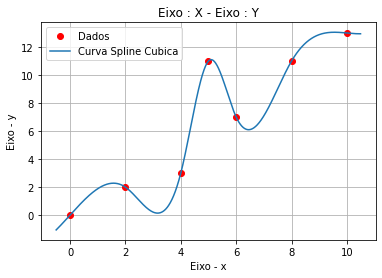

In [ ]:
Spline_Cubica(x = [0,2,4,5,6,8,10],
              y = [0,2,3,11,7,11,13],
              valor = 5,
              grafico = True)

# Parâmentos das funções

## coeficientes(x)

Constroi um matriz (n,m) com coeficientes de um sistema linear cuja solução determina os coeficientes que construiram a função Spline cubica que ira modela os dados apresentados.

**x** : Lista de valores
> Array 1-D contendo valores da variável independente. Os valores devem ser reais, finitos e em ordem estritamente crescente.

## r(x)

A constroi uma lista, matriz (1,n), com resultados para solução do sistema linear que permiter determina os coeficientes do Spline.

**x** : Lista de valores
> Array contendo valores da variável dependente. Pode ter um número arbitrário de dimensões, mas o comprimento ao longo do eixo (veja abaixo) deve corresponder ao comprimento de x. Os valores devem ser finitos.

## `solucao(x,y)`

A função fornece os coeficientes do Spline Cubica por meio da solução do sistema linear construindo pela inserção dos dados.

**x** : Lista de valores
> Array 1-D contendo valores da variável independente. Os valores devem ser reais, finitos e em ordem estritamente crescente.

**y** : Lista de valores
> Array contendo valores da variável dependente. Pode ter um número arbitrário de dimensões, mas o comprimento ao longo do eixo (veja abaixo) deve corresponder ao comprimento de x. Os valores devem ser finitos.

Ela e construida tento como base das funções `coeficientes(x)` e `r(x)` 

##  `Spline_Cubica(x, y, valor, coeficientes = False, grafico = False)` 

**x** : Lista de valores
> Array 1-D contendo valores da variável independente. Os valores devem ser reais, finitos e em ordem estritamente crescente.

**y** : Lista de valores
> Array contendo valores da variável dependente. Pode ter um número arbitrário de dimensões, mas o comprimento ao longo do eixo (veja abaixo) deve corresponder ao comprimento de x. Os valores devem ser finitos.

**valor**: Float
> Fornecer o valor da função Spline cubica para um determinado número depois de construido o modelo da função sobre os parâmentros `x` e `y` seja esse valor pertecente ao intervalo da modelagem ou não.

**coeficientes**: Coeficientes da função Spline
> `True` para apresenta os diversos coeficientes que constituem a função Spline cubica

**grafico**: Gráfico da função Spline
> `True` para apresenta o gráfico da função Spline e os pontos que foram utilizados para construir ela

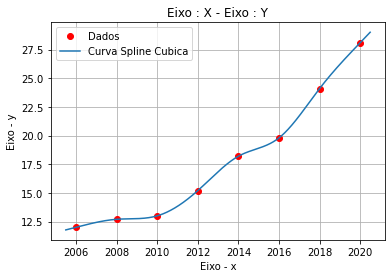

In [ ]:
Spline_Cubica(x = anos,
              y = concentracao,
              valor = 2022,
              coeficientes = False,
              grafico = True)

# **Referências**

1. [***Cubic Spline Interpolation***](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html)
2. [***Spline Cúbica***](https://estudar.com.vc/conceitos/interpolacao-polinomial/spline-cubica)
3. [***Cálculo de um Spline Cúbica Natural***](https://www.ime.unicamp.br/~valle/Teaching/MS211/Aula17complemento.pdf)
4. [***Métodos Numéricos Splines***](https://homepages.dcc.ufmg.br/~assuncao/an/splines.pdf)
5. [***Interpolação cúbica segmentada - spline***](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/i1-interpolacao_cubica_segmentada_-_spline.html)
6. [***Interpolação Polinomial Spline Cúbica***](https://www.ime.usp.br/mat/2458/textos/splines.pdf)
7. [***Funções em LaTeX***](https://app.mettzer.com/latex#fun%C3%A7%C3%B5es)